# **Overview**

The objective of this project is to  analyze, and compare the box office performance of movies from different regional Indian cinema industries (Tollywood, Mollywood, Bollywood, Gollywood, Marathi, and Bengali) for the years 2019–2024. The analysis aims to derive insights on box office trends, earnings correlation, budget efficiency, and movie success metrics.


In [1]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f2c7d8a585a2c9a0dc1263023ead1ce1257f32ad00c6925ade746e545ea5f0ce
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the Movies GDP dataset from the specified CSV file using Pandas
df2 = pd.read_csv('/content/drive/MyDrive/all_data_combined_box_office_data.csv')
df2

,Released Date,Movie,Worldwide,India Telugu Net,India Gross,Overseas,Budget,Verdict,Industry,Original Languages,Dubbed Languages,Status,India Malayalam Net,India Hindi Net,India Gujarati Net,India Marathi Net,India Bengali Net
0,25 Dec,Solo Brathuke So Better,22.3,18.10,21.1,1.2,20.0,Hit,Tollywood,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",Released,NaN,NaN,NaN,NaN,NaN
1,13 Mar,Shivan,0.25,0.20,0.23,0.02,2.0,NaN,Tollywood,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",Released,NaN,NaN,NaN,NaN,NaN
2,13 Mar,Eureka,0.35,0.25,0.3,0.05,3.0,NaN,Tollywood,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",Released,NaN,NaN,NaN,NaN,NaN
3,13 Mar,Madha,0.5,0.35,0.42,0.08,3.0,NaN,Tollywood,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",Released,NaN,NaN,NaN,NaN,NaN
4,13 Mar,Arjuna,0.35,0.25,0.3,0.05,3.0,NaN,Tollywood,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",Released,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,19 Jan,Asha,0,NaN,0,-,1.0,NaN,Bengali,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",Released,NaN,NaN,NaN,NaN,0.00
1900,19 Jan,Sentimentaaal,0.12,NaN,0.12,-,1.0,NaN,Bengali,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",Released,NaN,NaN,NaN,NaN,0.11
1901,19 Jan,Hubba,0.36,NaN,0.36,-,1.0,NaN,Bengali,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",Released,NaN,NaN,NaN,NaN,0.31
1902,12 Jan,Bijoyar Pore,0.28,NaN,0.28,-,1.0,NaN,Bengali,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",Released,NaN,NaN,NaN,NaN,0.27


# **Data Analysis**
# Basic Metrics


In [5]:
# Checking Shape of data
df2.shape

(1904, 17)

In [6]:
# Columns in data
df2.columns

Index(['Released Date', 'Movie', 'Worldwide', 'India Telugu Net',
       'India Gross', 'Overseas', 'Budget', 'Verdict', 'Industry',
       'Original Languages', 'Dubbed Languages', 'Status',
       'India Malayalam Net', 'India Hindi Net', 'India Gujarati Net',
       'India Marathi Net', 'India Bengali Net'],
      dtype='object')

In [7]:
# Overview of the dataset structure
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released Date        1904 non-null   object 
 1   Movie                1904 non-null   object 
 2   Worldwide            1904 non-null   object 
 3   India Telugu Net     726 non-null    float64
 4   India Gross          1904 non-null   object 
 5   Overseas             1904 non-null   object 
 6   Budget               1904 non-null   float64
 7   Verdict              654 non-null    object 
 8   Industry             1904 non-null   object 
 9   Original Languages   1904 non-null   object 
 10  Dubbed Languages     1904 non-null   object 
 11  Status               1904 non-null   object 
 12  India Malayalam Net  355 non-null    float64
 13  India Hindi Net      414 non-null    float64
 14  India Gujarati Net   110 non-null    float64
 15  India Marathi Net    148 non-null    f

# **Datatype Conversions**

In [9]:
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numeric_columns] = df2[numeric_columns].fillna(0)


In [10]:
# Replace NaN values with 0 in the numeric columns
df2[numeric_columns] = df2[numeric_columns].fillna(0)

# Display the result
print(df2[['Worldwide', 'India Telugu Net', 'India Malayalam Net', 'India Hindi Net',
                'India Gujarati Net', 'India Marathi Net', 'India Bengali Net',
                'India Gross', 'Overseas', 'Budget']].head())


  Worldwide  India Telugu Net  India Malayalam Net  India Hindi Net  \
0      22.3             18.10                  0.0              0.0   
1      0.25              0.20                  0.0              0.0   
2      0.35              0.25                  0.0              0.0   
3       0.5              0.35                  0.0              0.0   
4      0.35              0.25                  0.0              0.0   

   India Gujarati Net  India Marathi Net  India Bengali Net India Gross  \
0                 0.0                0.0                0.0        21.1   
1                 0.0                0.0                0.0        0.23   
2                 0.0                0.0                0.0         0.3   
3                 0.0                0.0                0.0        0.42   
4                 0.0                0.0                0.0         0.3   

  Overseas  Budget  
0      1.2    20.0  
1     0.02     2.0  
2     0.05     3.0  
3     0.08     3.0  
4     0.05     3.

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released Date        1904 non-null   object 
 1   Movie                1904 non-null   object 
 2   Worldwide            1904 non-null   object 
 3   India Telugu Net     1904 non-null   float64
 4   India Gross          1904 non-null   object 
 5   Overseas             1904 non-null   object 
 6   Budget               1904 non-null   float64
 7   Verdict              654 non-null    object 
 8   Industry             1904 non-null   object 
 9   Original Languages   1904 non-null   object 
 10  Dubbed Languages     1904 non-null   object 
 11  Status               1904 non-null   object 
 12  India Malayalam Net  1904 non-null   float64
 13  India Hindi Net      1904 non-null   float64
 14  India Gujarati Net   1904 non-null   float64
 15  India Marathi Net    1904 non-null   f

# **Data Cleaning**

In [12]:
df2.isna().sum()

,0
Released Date,0
Movie,0
Worldwide,0
India Telugu Net,0
India Gross,0
Overseas,0
Budget,0
Verdict,1250
Industry,0
Original Languages,0


In [13]:
df2['Verdict'] = df2['Verdict'].fillna('Unknown')

# Verify if nulls are replaced
print(df2['Verdict'].isnull().sum())  # Should print 0


0


In [14]:
df2.isna().sum()

,0
Released Date,0
Movie,0
Worldwide,0
India Telugu Net,0
India Gross,0
Overseas,0
Budget,0
Verdict,0
Industry,0
Original Languages,0


In [15]:
# Check the number of unique values in each column of the DataFrame 'df'
# This helps in understanding the diversity of data in each column.
df2.nunique()

,0
Released Date,408
Movie,1755
Worldwide,714
India Telugu Net,389
India Gross,740
Overseas,311
Budget,84
Verdict,10
Industry,6
Original Languages,6


In [16]:
# Count the unique values in the 'Worldwide' column
worldwide_counts = df2['Worldwide'].value_counts()
# Display the result
print(worldwide_counts)

Worldwide
-        125
0.03      59
0.04      57
0.01      53
0.02      47
        ... 
0.75       1
0.58       1
17.39      1
0.55       1
1.28       1
Name: count, Length: 714, dtype: int64


In [17]:
# Count the unique values in the 'India Gross' column
India_Gross_counts = df2['India Gross'].value_counts()
# Display the result
print(India_Gross_counts)

India Gross
-        63
0.04     59
0.03     58
0        57
0.01     53
         ..
12.23     1
14.53     1
41.54     1
4.1       1
2.98      1
Name: count, Length: 740, dtype: int64


In [18]:
# Count the unique values in the 'Overseas' column
Overseas_counts = df2['Overseas'].value_counts()
# Display the result
print(Overseas_counts)

Overseas
-       853
0       362
0.5      19
0.2      15
1        14
       ... 
76        1
31        1
203       1
0.03      1
104       1
Name: count, Length: 311, dtype: int64


In [19]:
# Count the unique values in the 'Budget' column
Budget_counts = df2['Budget'].value_counts()
# Display the result
print(Budget_counts)

Budget
1.0       1427
15.0        37
2.0         34
10.0        31
5.0         27
          ... 
820.0        1
1850.0       1
1150.0       1
135.0        1
165.0        1
Name: count, Length: 84, dtype: int64


In [20]:
# Count the unique values in the 'India Telugu Net' column
India_Telugu_Net_counts = df2['India Telugu Net'].value_counts()
# Display the result
print(India_Telugu_Net_counts)

India Telugu Net
0.00      1192
0.03        26
0.07        22
0.04        19
0.06        19
          ... 
11.26        1
15.27        1
0.89         1
1.75         1
145.48       1
Name: count, Length: 389, dtype: int64


In [21]:
# Count the unique values in the 'India Malayalam  Net' column
India_Malayalam_Net_counts = df2['India Malayalam Net'].value_counts()
# Display the result
print(India_Malayalam_Net_counts)

India Malayalam Net
0.00     1557
0.04       19
0.02       14
0.01       13
0.03       13
         ... 
13.81       1
1.06        1
25.63       1
49.74       1
1.22        1
Name: count, Length: 194, dtype: int64


In [22]:
# Count the unique values in the 'India Hindi   Net' column
India_Hindi_Net_counts = df2['India Hindi Net'].value_counts()
# Display the result
print(India_Hindi_Net_counts)

India Hindi Net
0.00     1501
0.01       14
0.04       11
0.07        9
0.03        9
         ... 
20.42       1
4.00        1
45.60       1
52.15       1
0.14        1
Name: count, Length: 312, dtype: int64


In [23]:
# Count the unique values in the 'India Gujarati   Net' column
India_Gujarati_Net_counts = df2['India Gujarati Net'].value_counts()
# Display the result
print(India_Gujarati_Net_counts)

India Gujarati Net
0.00    1797
0.04       7
0.02       6
0.07       5
0.03       5
        ... 
2.95       1
0.67       1
0.39       1
0.34       1
0.87       1
Name: count, Length: 73, dtype: int64


In [24]:
# Count the unique values in the 'India Marathi  Net' column
India_Marathi_Net_counts = df2['India Marathi Net'].value_counts()
# Display the result
print(India_Marathi_Net_counts)

India Marathi Net
0.00     1759
0.04        9
0.08        9
0.09        8
0.07        6
         ... 
10.00       1
7.19        1
0.40        1
0.86        1
7.37        1
Name: count, Length: 82, dtype: int64


In [25]:
# Count the unique values in the 'India Bengali  Net' column
India_Bengali_Net_counts = df2['India Bengali Net'].value_counts()
# Display the result
print(India_Bengali_Net_counts)

India Bengali Net
0.00    1774
0.04      11
0.01      10
0.03       8
0.02       6
        ... 
1.06       1
3.70       1
3.26       1
5.09       1
0.48       1
Name: count, Length: 76, dtype: int64


# **Descriptive Statistics**


In [26]:
# Summary statistics for numerical columns
summary_statistics = df2.describe(include='all').T
# Display the statistics in the console
summary_statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Released Date,1904,408,22 Nov,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,1904,1755,Aho Vikramaarka! (Hindi),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Worldwide,1904,714,-,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India Telugu Net,1904.0,NaN,NaN,NaN,3.612474,19.44416,0.0,0.0,0.0,0.16,431.01
India Gross,1904,740,-,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overseas,1904,311,-,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Budget,1904.0,NaN,NaN,NaN,34.758009,196.935486,1.0,1.0,1.0,1.625,3200.0
Verdict,1904,10,Unknown,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,1904,6,Tollywood,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original Languages,1904,6,Telugu,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import pandas as pd

# Create a dictionary to store all statistical results
statistical = {}

# 1. Variance
statistical['Variance'] = df2[numerical_columns].var()

# 2. Covariance matrix
statistical['Covariance Matrix'] = df2[numerical_columns].cov()

# 3. Correlation table
statistical['Correlation Table'] = df2[numerical_columns].corr()

# 4. Mode
statistical['Mode Values'] = df2[numerical_columns].mode().iloc[0]

# 5. Range (max - min)
statistical['Range Values'] = df2[numerical_columns].max() - df2[numerical_columns].min()

# 6. Quartiles and IQR
q1_values = df2[numerical_columns].quantile(0.25)
q3_values = df2[numerical_columns].quantile(0.75)
iqr_values = q3_values - q1_values
statistical['Q1'] = q1_values
statistical['Q3'] = q3_values
statistical['IQR'] = iqr_values

# 7. Outliers detection based on IQR
outliers = {}
for col in numerical_columns:
    lower_bound = q1_values[col] - 1.5 * iqr_values[col]
    upper_bound = q3_values[col] + 1.5 * iqr_values[col]
    outliers[col] = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)].shape[0]
statistical['Outliers'] = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers Count'])

# Combine all results into a single DataFrame for easy display
combined_stats = pd.DataFrame()

for stat_name, stat_values in statistical.items():
    if isinstance(stat_values, pd.DataFrame):
        combined_stats = pd.concat([combined_stats, stat_values], axis=1)
    else:
        combined_stats[stat_name] = stat_values

# Display the combined results
print(combined_stats)

                         Variance     Worldwide   India Gross      Overseas  \
Worldwide            1.532359e+06  1.532359e+06  33961.543591  1.959754e+06   
India Gross          9.952577e+03  3.396154e+04   9952.576549  2.991727e+04   
Overseas             1.627048e+06  1.959754e+06  29917.271233  1.627048e+06   
Budget               3.878359e+04  1.755669e+05   6797.454386  2.477011e+05   
India Telugu Net     3.780754e+02  7.283414e+02    744.858152 -4.284675e+02   
India Malayalam Net  4.073708e+01 -1.553743e+01     75.419281 -2.293527e+02   
India Hindi Net      1.633592e+03  4.073531e+03   2371.361960  1.530987e+03   
India Gujarati Net   1.206029e+00 -1.888812e+01     -1.655391 -2.956509e+01   
India Marathi Net    7.640776e+00 -4.717129e+01      1.337276 -9.410900e+01   
India Bengali Net    3.135424e-01 -1.364592e+01     -1.665254 -2.103662e+01   

                            Budget  India Telugu Net  India Malayalam Net  \
Worldwide            175566.928088        728.341400 

In [31]:
 combined_stats

,Variance,Worldwide,India Gross,Overseas,Budget,India Telugu Net,India Malayalam Net,India Hindi Net,India Gujarati Net,India Marathi Net,...,India Hindi Net,India Gujarati Net,India Marathi Net,India Bengali Net,Mode Values,Range Values,Q1,Q3,IQR,Outliers Count
Worldwide,1.532359e+06,1.532359e+06,33961.543591,1.959754e+06,175566.928088,728.341400,-15.537428,4073.530714,-18.888119,-47.171287,...,0.078784,-0.013565,-0.013362,-0.019039,0.03,17380.00,0.08,27.830,27.750,305
India Gross,9.952577e+03,3.396154e+04,9952.576549,2.991727e+04,6797.454386,744.858152,75.419281,2371.361960,-1.655391,1.337276,...,0.578614,-0.014991,0.004769,-0.029320,0.04,1416.90,0.08,18.350,18.270,292
Overseas,1.627048e+06,1.959754e+06,29917.271233,1.627048e+06,247701.084970,-428.467529,-229.352673,1530.986673,-29.565094,-94.108996,...,0.022348,-0.016143,-0.019989,-0.022292,0.00,16902.50,0.00,16.500,16.500,171
Budget,3.878359e+04,1.755669e+05,6797.454386,2.477011e+05,38783.585689,360.628668,-0.489398,862.940691,-3.194234,-7.564518,...,0.108414,-0.014769,-0.013896,-0.017743,1.00,3199.00,1.00,1.625,0.625,441
India Telugu Net,3.780754e+02,7.283414e+02,744.858152,-4.284675e+02,360.628668,378.075354,-3.756343,-26.295849,-0.357620,-0.936813,...,-0.033460,-0.016748,-0.017430,-0.020358,0.00,431.01,0.00,0.160,0.160,384
India Malayalam Net,4.073708e+01,-1.553743e+01,75.419281,-2.293527e+02,-0.489398,-3.756343,40.737078,-7.565102,-0.102884,-0.269514,...,-0.029326,-0.014678,-0.015276,-0.017842,0.00,130.25,0.00,0.000,0.000,347
India Hindi Net,1.633592e+03,4.073531e+03,2371.361960,1.530987e+03,862.940691,-26.295849,-7.565102,1633.592010,-0.720230,-1.886699,...,1.000000,-0.016226,-0.016887,-0.019724,0.00,1030.42,0.00,0.000,0.000,403
India Gujarati Net,1.206029e+00,-1.888812e+01,-1.655391,-2.956509e+01,-3.194234,-0.357620,-0.102884,-0.720230,1.206029,-0.025659,...,-0.016226,1.000000,-0.008453,-0.009872,0.00,28.93,0.00,0.000,0.000,107
India Marathi Net,7.640776e+00,-4.717129e+01,1.337276,-9.410900e+01,-7.564518,-0.936813,-0.269514,-1.886699,-0.025659,7.640776,...,-0.016887,-0.008453,1.000000,-0.010275,0.00,76.28,0.00,0.000,0.000,145
India Bengali Net,3.135424e-01,-1.364592e+01,-1.665254,-2.103662e+01,-1.956538,-0.221648,-0.063766,-0.446389,-0.006071,-0.015903,...,-0.019724,-0.009872,-0.010275,1.000000,0.00,13.18,0.00,0.000,0.000,130


# **Data Visualization**

<ipython-input-32-ea098e244e0c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_earnings_sorted.index, y=language_earnings_sorted["Worldwide"], palette="viridis")


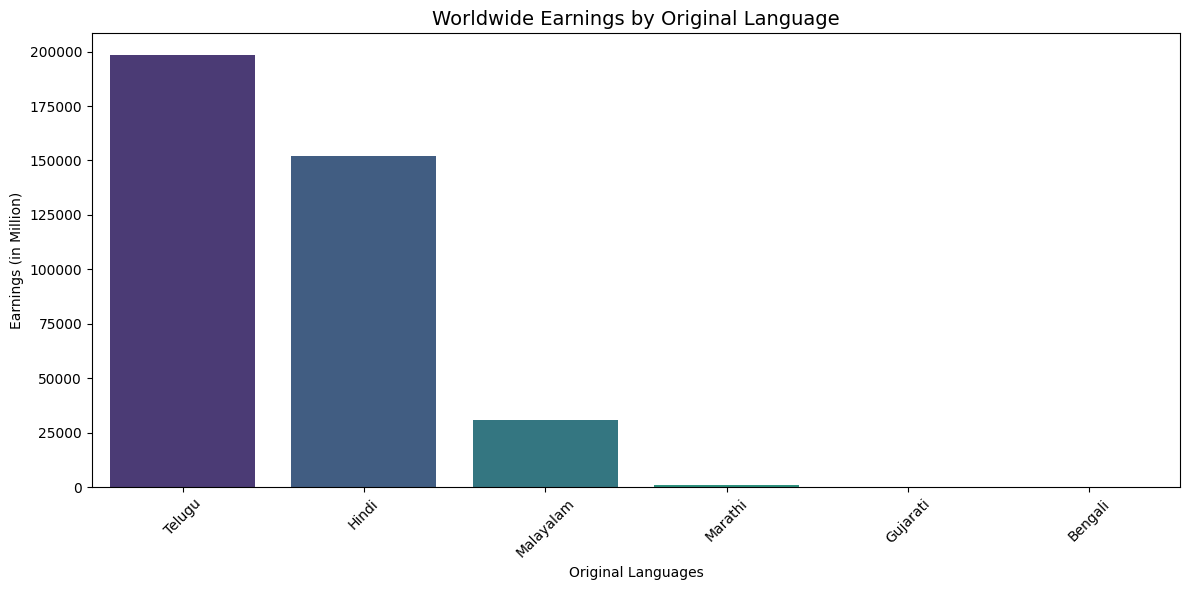

In [32]:
#  1. Worldwide Earnings by Original Language
language_earnings = df2.groupby("Original Languages").sum()[['Worldwide']]
language_earnings_sorted = language_earnings.sort_values(by="Worldwide", ascending=False)

# Plot: Contribution to Worldwide Earnings by Language
plt.figure(figsize=(12, 6))
sns.barplot(x=language_earnings_sorted.index, y=language_earnings_sorted["Worldwide"], palette="viridis")
plt.title("Worldwide Earnings by Original Language", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Earnings (in Million)")
plt.xlabel("Original Languages")
plt.tight_layout()
plt.show()


<ipython-input-34-4982b47a3032>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_columns, y=regional_totals, palette="mako")


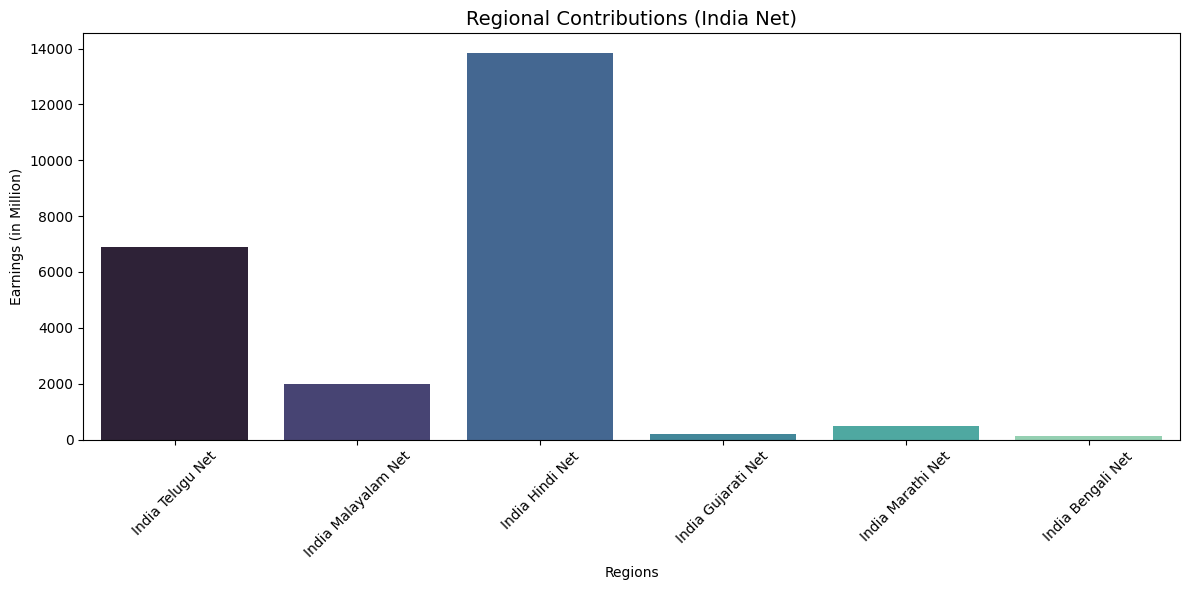

In [34]:
# 2. Regional Contributions (India Net)

regional_totals = df2[regional_columns].sum()

# Plot: Regional earnings contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_columns, y=regional_totals, palette="mako")
plt.title("Regional Contributions (India Net)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Earnings (in Million)")
plt.xlabel("Regions")
plt.tight_layout()
plt.show()

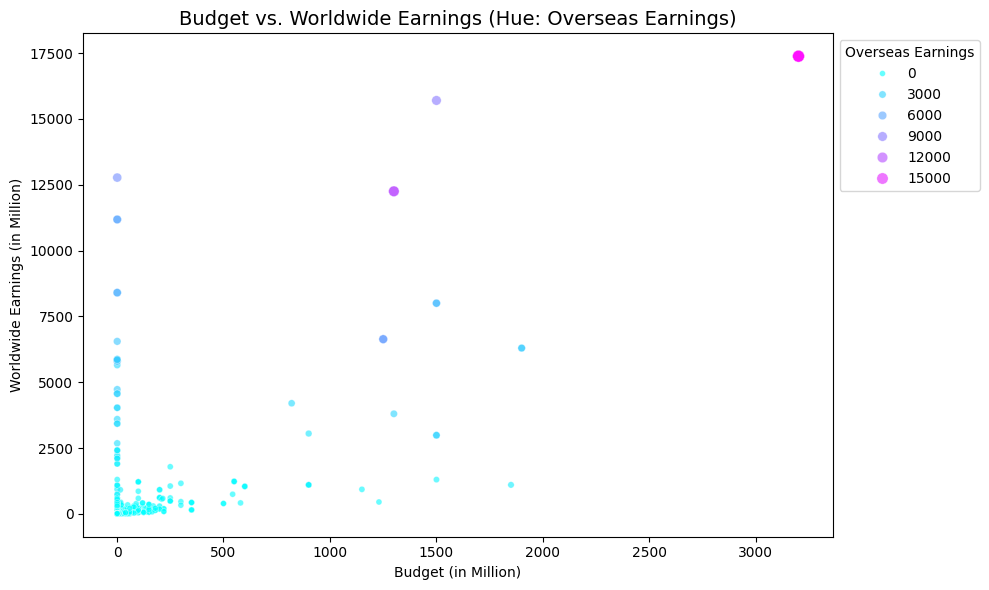

In [35]:
# 3. Budget vs. Worldwide Earnings (Hue: Overseas)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df2, x="Budget", y="Worldwide", hue="Overseas", size="Overseas",
    palette="cool", alpha=0.6
)
plt.title("Budget vs. Worldwide Earnings (Hue: Overseas Earnings)", fontsize=14)
plt.xlabel("Budget (in Million)")
plt.ylabel("Worldwide Earnings (in Million)")
plt.legend(title="Overseas Earnings", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<ipython-input-38-2455f7609db3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional_data.fillna(0, inplace=True)


<Figure size 1500x800 with 0 Axes>

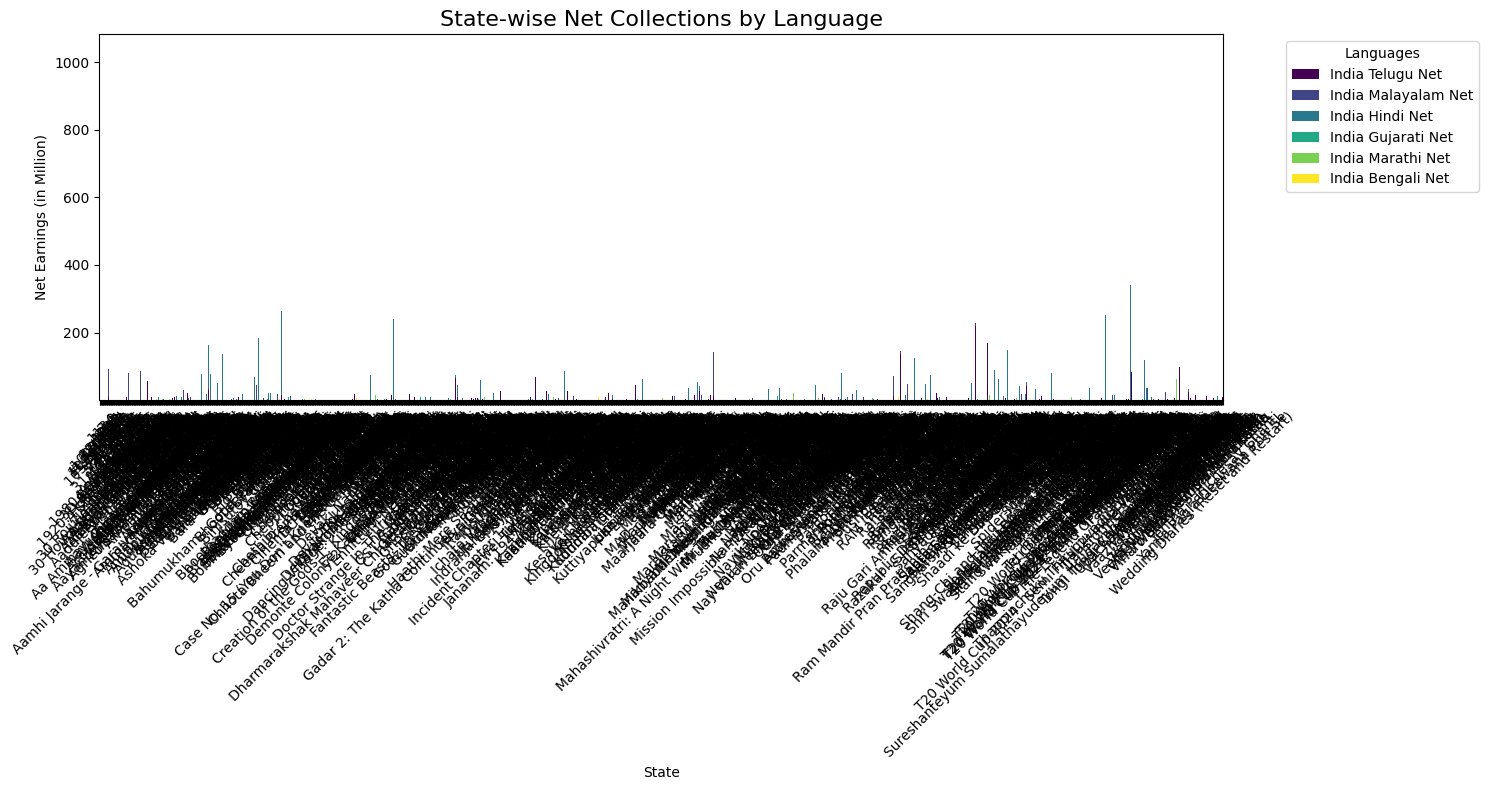

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


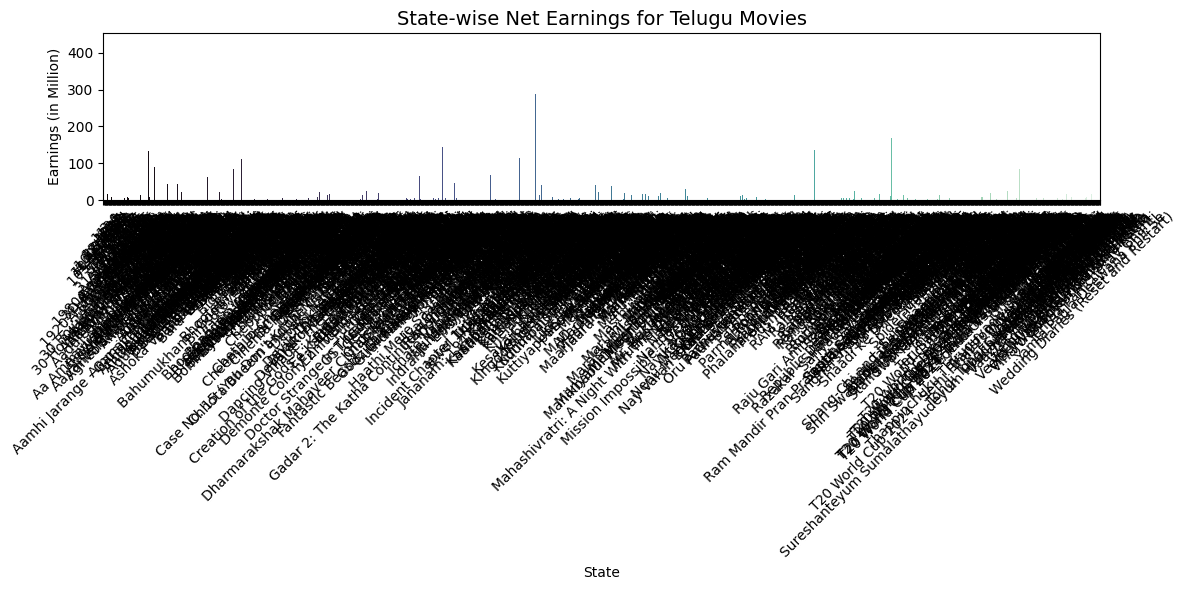

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


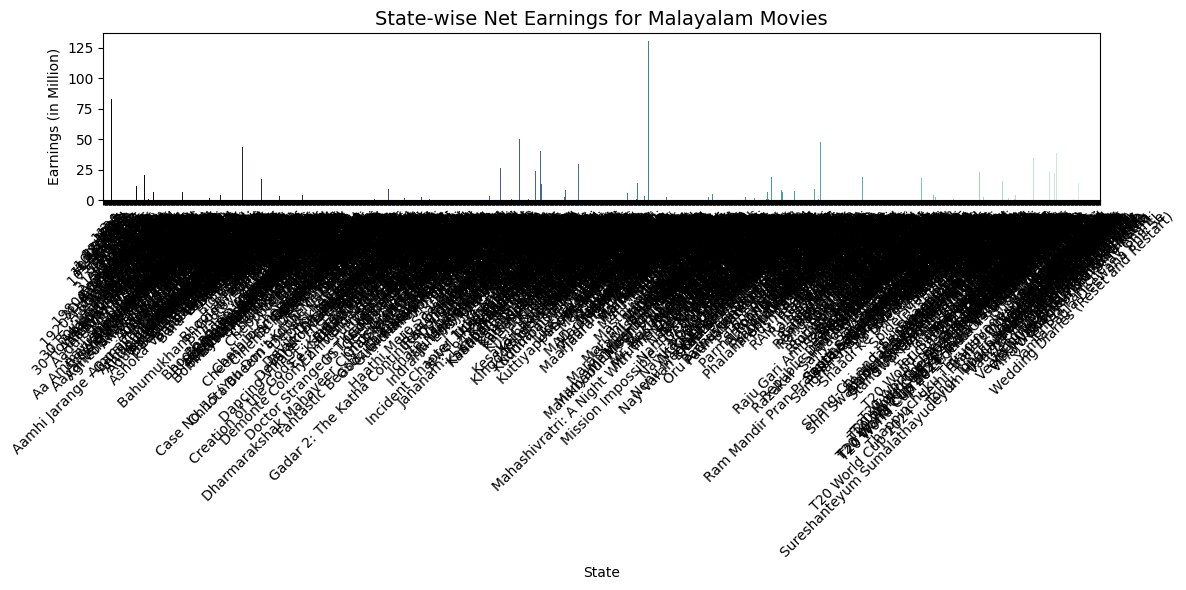

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


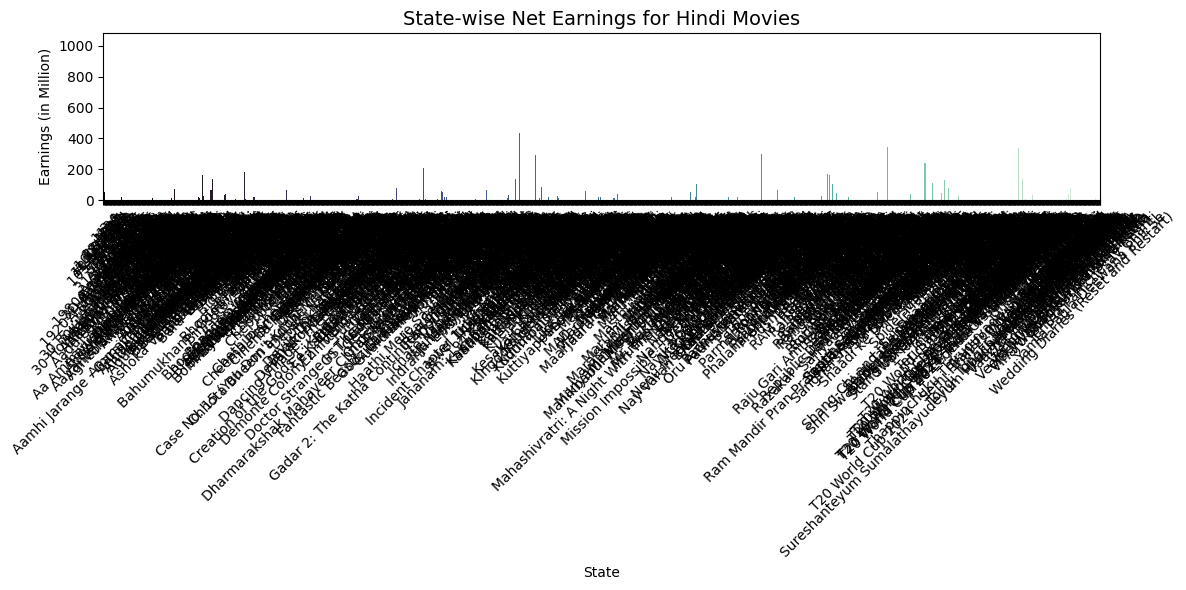

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


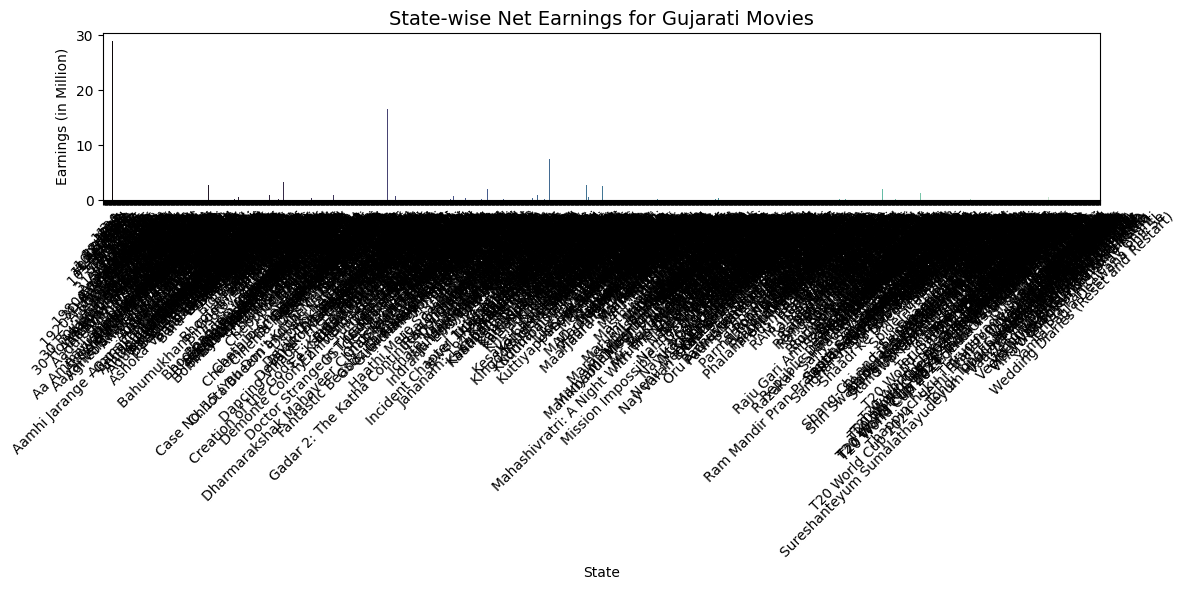

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


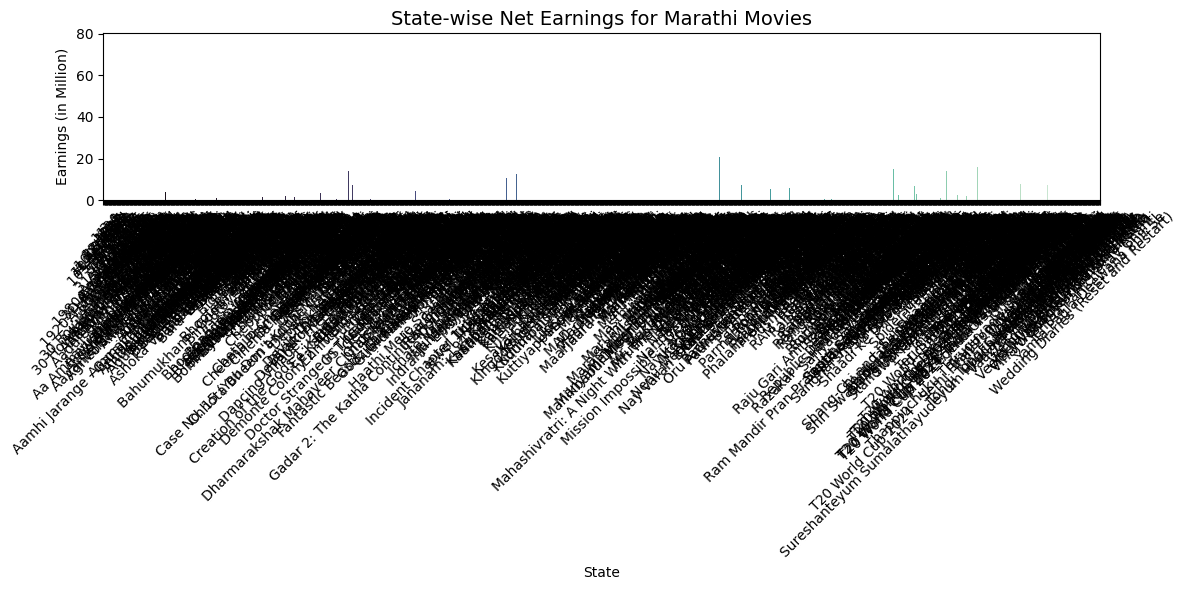

<ipython-input-38-2455f7609db3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")


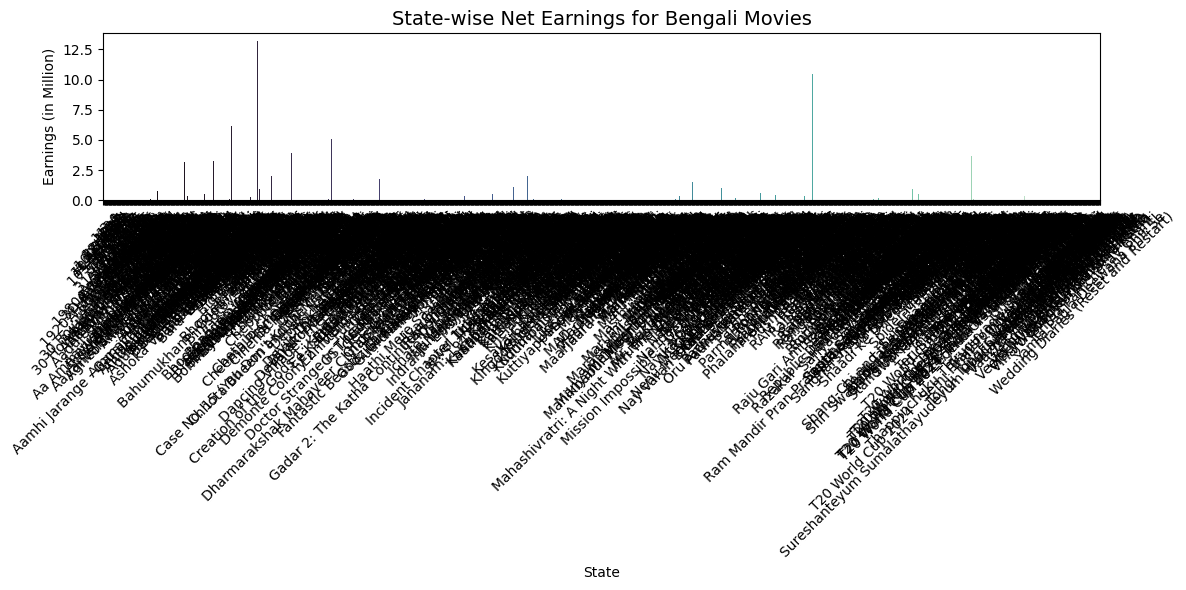

In [38]:
# Group and sum by state for regional nets
regional_data = df2[[
    'Movie', 'India Telugu Net', 'India Malayalam Net',
    'India Hindi Net', 'India Gujarati Net',
    'India Marathi Net', 'India Bengali Net'
]]

# Fill missing values with 0
regional_data.fillna(0, inplace=True)

# Aggregate by state
statewise_totals = regional_data.groupby('Movie').sum()

# Plot: State-wise Telugu Net, Malayalam Net, etc.
plt.figure(figsize=(15, 8))
statewise_totals.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title("State-wise Net Collections by Language", fontsize=16)
plt.ylabel("Net Earnings (in Million)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.legend(title="Languages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Individual plots for each language
languages = [
    'India Telugu Net', 'India Malayalam Net',
    'India Hindi Net', 'India Gujarati Net',
    'India Marathi Net', 'India Bengali Net'
]

for language in languages:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=statewise_totals.index, y=statewise_totals[language], palette="mako")
    plt.title(f"State-wise Net Earnings for {language.split()[-2]} Movies", fontsize=14)
    plt.ylabel("Earnings (in Million)")
    plt.xlabel("Movies")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-51-165226bcdfdc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Multiple Languages'] = df_filtered['Original Languages'].apply(lambda x: len(x.split(',')) > 1)
<ipython-input-51-165226bcdfdc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['India Gross'] = pd.to_numeric(df_filtered['India Gross'], errors='coerce')
<ipython-input-51-165226bcdfdc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

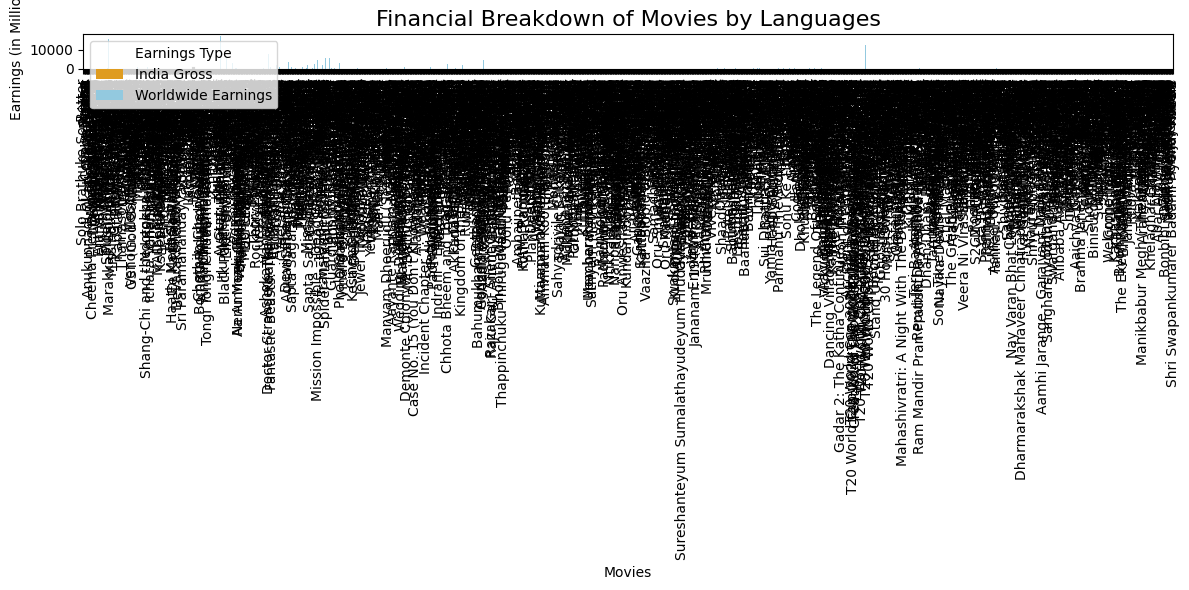

,Movie,Original Languages,Dubbed Languages,India Gross,Overseas,Budget,Verdict,Industry,Worldwide,Multiple Languages,Total Earnings
0,Solo Brathuke So Better,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",21.10,1.20,20.0,Hit,Tollywood,22.30,False,44.6
1,Shivan,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",0.23,0.02,2.0,Unknown,Tollywood,0.25,False,0.5
2,Eureka,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",0.30,0.05,3.0,Unknown,Tollywood,0.35,False,0.7
3,Madha,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",0.42,0.08,3.0,Unknown,Tollywood,0.50,False,1.0
4,Arjuna,Telugu,"Hindi, Malayalam, Marathi, Gujarati, Bengali",0.30,0.05,3.0,Unknown,Tollywood,0.35,False,0.7
...,...,...,...,...,...,...,...,...,...,...,...
1899,Asha,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",0.00,NaN,1.0,Unknown,Bengali,0.00,False,NaN
1900,Sentimentaaal,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",0.12,NaN,1.0,Unknown,Bengali,0.12,False,NaN
1901,Hubba,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",0.36,NaN,1.0,Unknown,Bengali,0.36,False,NaN
1902,Bijoyar Pore,Bengali,"Telugu, Hindi, Malayalam, Marathi, Gujarati",0.28,NaN,1.0,Unknown,Bengali,0.28,False,NaN


In [51]:
# Assuming df is your DataFrame
# First, clean the column names to remove any leading/trailing spaces
df2.columns = df2.columns.str.strip()

# Selecting required columns: 'Original Languages', 'Dubbed Languages', 'India Gross', 'Overseas', 'Budget', 'Verdict', 'Industry', 'Worldwide'
required_columns = ['Movie', 'Original Languages', 'Dubbed Languages', 'India Gross', 'Overseas', 'Budget', 'Verdict', 'Industry', 'Worldwide']

# Filter the data to select only the required columns
df_filtered = df2[required_columns]

# Clean and preprocess 'Original Languages' and 'Dubbed Languages'
df_filtered['Multiple Languages'] = df_filtered['Original Languages'].apply(lambda x: len(x.split(',')) > 1)

# Extracting financial columns (India Gross, Overseas, Worldwide)
df_filtered['India Gross'] = pd.to_numeric(df_filtered['India Gross'], errors='coerce')
df_filtered['Overseas'] = pd.to_numeric(df_filtered['Overseas'], errors='coerce')
df_filtered['Worldwide'] = pd.to_numeric(df_filtered['Worldwide'], errors='coerce')

# Creating a new column for the combined earnings (India + Overseas + Worldwide)
df_filtered['Total Earnings'] = df_filtered['India Gross'] + df_filtered['Overseas'] + df_filtered['Worldwide']

# Now let's visualize this data

# Plotting the financial breakdown of the movies based on their languages
plt.figure(figsize=(12, 6))

# Bar plot for Worldwide earnings vs India gross earnings
sns.barplot(x='Movie', y='India Gross', data=df_filtered, color='orange', label='India Gross')
sns.barplot(x='Movie', y='Worldwide', data=df_filtered, color='skyblue', label='Worldwide Earnings')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Adding titles and labels
plt.title('Financial Breakdown of Movies by Languages', fontsize=16)
plt.xlabel('Movies')
plt.ylabel('Earnings (in Million)')
plt.legend(title='Earnings Type', loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Displaying the first few rows to verify
df_filtered

<ipython-input-60-14689323c3c6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_movies.index, y=highest_movies.values, ax=axes[0], palette="Blues_d")
<ipython-input-60-14689323c3c6>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_movies.index, y=lowest_movies.values, ax=axes[1], palette="Reds_d")


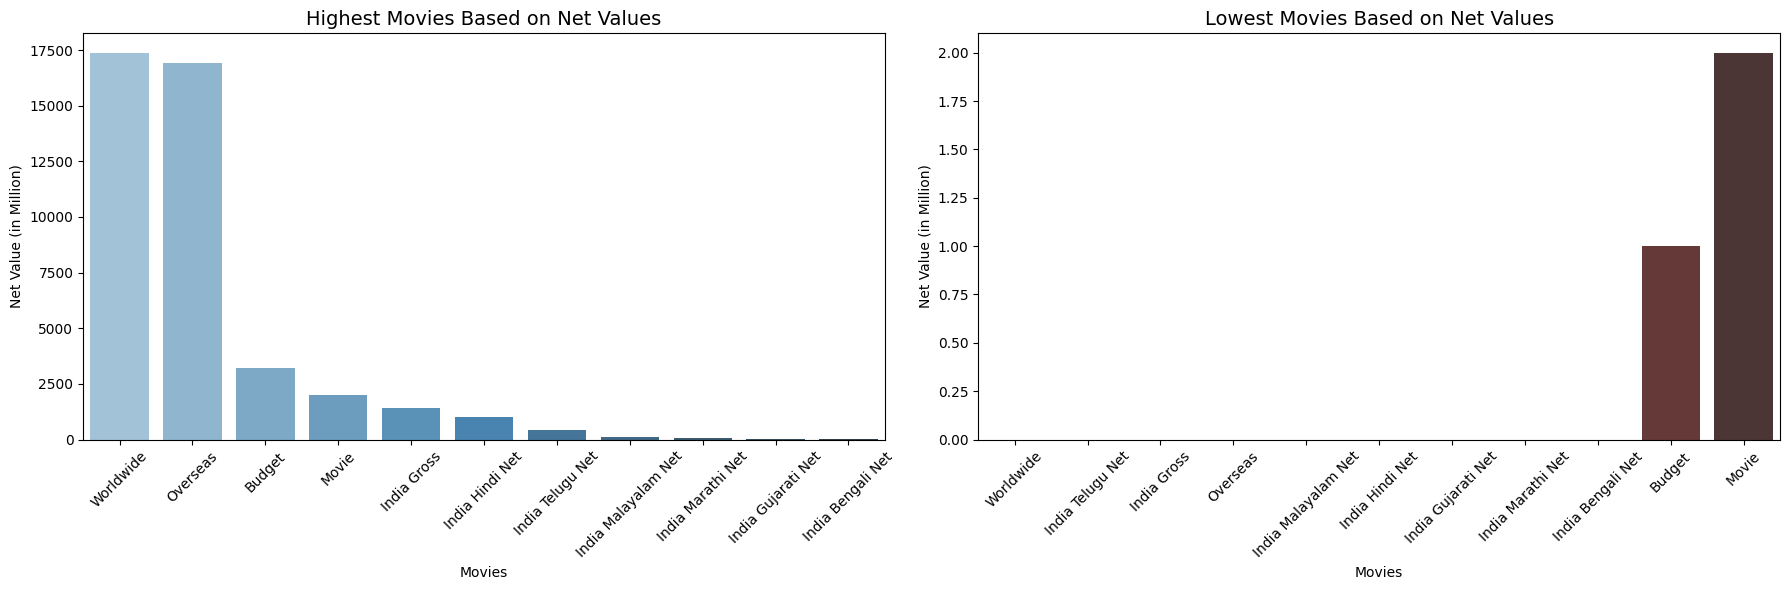

Highest Movies Based on Net Values:
Worldwide              17380.00
Overseas               16902.50
Budget                  3200.00
Movie                   2018.00
India Gross             1416.90
India Hindi Net         1030.42
India Telugu Net         431.01
India Malayalam Net      130.25
India Marathi Net         76.28
India Gujarati Net        28.93
India Bengali Net         13.18
dtype: float64

Lowest Movies Based on Net Values:
Worldwide              0.0
India Telugu Net       0.0
India Gross            0.0
Overseas               0.0
India Malayalam Net    0.0
India Hindi Net        0.0
India Gujarati Net     0.0
India Marathi Net      0.0
India Bengali Net      0.0
Budget                 1.0
Movie                  2.0
dtype: float64


In [60]:
# Assuming df2 is your DataFrame, and it is already cleaned and loaded
# Clean the column names to remove any leading/trailing spaces
df2.columns = df2.columns.str.strip()

# Selecting the columns related to net values
required_columns = [
    'Movie', 'Worldwide', 'India Telugu Net', 'India Gross', 'Overseas', 'Budget',
    'India Malayalam Net', 'India Hindi Net', 'India Gujarati Net', 'India Marathi Net', 'India Bengali Net'
]

# Filter the data to select only the required columns
df_filtered = df2[required_columns]

# Convert the financial columns to numeric, coercing errors to NaN (useful if any values are non-numeric)
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# Get the highest and lowest movies based on net values for each financial column

# Highest and lowest values for each column
highest_movies = df_filtered.max().sort_values(ascending=False)
lowest_movies = df_filtered.min().sort_values(ascending=True)

# Plotting the highest and lowest movies
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Highest values plot
sns.barplot(x=highest_movies.index, y=highest_movies.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Highest Movies Based on Net Values', fontsize=14)
axes[0].set_xlabel('Movies')
axes[0].set_ylabel('Net Value (in Million)')
axes[0].tick_params(axis='x', rotation=45)

# Lowest values plot
sns.barplot(x=lowest_movies.index, y=lowest_movies.values, ax=axes[1], palette="Reds_d")
axes[1].set_title('Lowest Movies Based on Net Values', fontsize=14)
axes[1].set_xlabel('Movies')
axes[1].set_ylabel('Net Value (in Million)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Optionally, print the highest and lowest movies in each category
print("Highest Movies Based on Net Values:")
print(highest_movies)

print("\nLowest Movies Based on Net Values:")
print(lowest_movies)


# **Report**

In [61]:
# Generating a profile report for the healthcare dataset
profile = ProfileReport(df2, title="Movies GDP Dataset Report")
# Saving the profile report to an HTML file
profile.to_file('"Movies GDP   Dataset Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Key points**
- Extracted data for Tollywood and Mollywood, Bollywood,Marthi,Begnali, gollywood industries.
- Analyzed financial metrics: Budget, Overseas, India Telugu Net, India Gross, Worldwide, and India Malayalam Net, Net	India Hindi Net,	India Gujarati Net,	India Marathi Net	,India Bengali Net.
- Visualized highest and lowest values with associated movie titles for each metric.

# **Conclusion**
The analysis concentrated on the Tollywood and Mollywood industries, assessing crucial financial metrics such as Budget, Overseas earnings, India Telugu Net, India Gross, Worldwide earnings, and India Malayalam Net. By visualizing the highest and lowest values for these metrics, the program identified the top-performing movies in each financial category, offering valuable insights.